## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [3]:
#CODE
titanic = pd.read_csv('titanic.csv')
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [199]:
titanic.shape

(891, 12)

In [200]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [201]:
#CODE


def skipped_values(df):
    rows =  df.shape[0]
    columns = df.columns

    for column in columns:
        not_null_count = titanic[column].isna().value_counts().loc[False]
        print(f"Колонка: {column} має {rows - not_null_count} пропущених значень")


skipped_values(titanic)


Колонка: PassengerId має 0 пропущених значень
Колонка: Survived має 0 пропущених значень
Колонка: Pclass має 0 пропущених значень
Колонка: Name має 0 пропущених значень
Колонка: Sex має 0 пропущених значень
Колонка: Age має 177 пропущених значень
Колонка: SibSp має 0 пропущених значень
Колонка: Parch має 0 пропущених значень
Колонка: Ticket має 0 пропущених значень
Колонка: Fare має 0 пропущених значень
Колонка: Cabin має 687 пропущених значень
Колонка: Embarked має 2 пропущених значень


Ваші висновки:

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



Text(0.5, 1.0, 'Матриця коефіцієнтів')

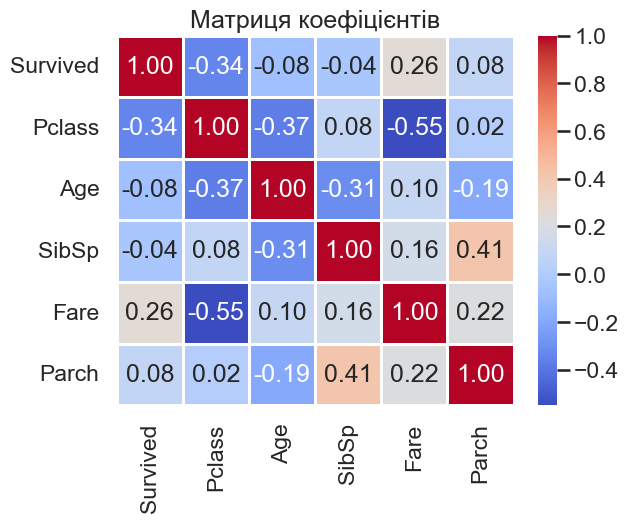

In [12]:
df  = titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Fare', 'Parch']]
coeficients = df.corr('pearson')


sns.heatmap(coeficients, annot=True, fmt=".2f", linewidths=1,  cmap='coolwarm')
plt.title("Матриця коефіцієнтів")

Ваші висновки:
"Survived" та "Pclass" мають кореляцію -0.34, що свідчить про помірно негативний зв'язок. Це може означати, що пасажири з вищим класом (де клас 1 вище за клас 3) мали більше шансів вижити.

"Parch" і "SibSp" мають  позитивний кореляційний зв'язок (0.41), це може свідчити про те, що пасажири, які подорожують з батьками/дітьми, часто також подорожують з братами, сестрами або подружжям.

"Pclass" та "Fare" мають кореляцію -0,55, що вказує на тенденцію: чим вищий рівень комфорту класу (менше число класу), тим вища ціна квитка.

"Fare" і "Survived" мають  позитивний кореляційний зв'язок (0.26), що може вказувати на те, що пасажири, які платили вищий тариф, мали вищу ймовірність виживання.

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [203]:
#CODE
def fill_nan(df, column):
    median_value = df[column].mean()
    df.fillna({column: median_value}, inplace=True)
    return df


newdf = fill_nan(titanic, 'Age')

skipped_values(newdf)



Колонка: PassengerId має 0 пропущених значень
Колонка: Survived має 0 пропущених значень
Колонка: Pclass має 0 пропущених значень
Колонка: Name має 0 пропущених значень
Колонка: Sex має 0 пропущених значень
Колонка: Age має 0 пропущених значень
Колонка: SibSp має 0 пропущених значень
Колонка: Parch має 0 пропущених значень
Колонка: Ticket має 0 пропущених значень
Колонка: Fare має 0 пропущених значень
Колонка: Cabin має 687 пропущених значень
Колонка: Embarked має 2 пропущених значень


Ваші висновки:

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





<BarContainer object of 5 artists>

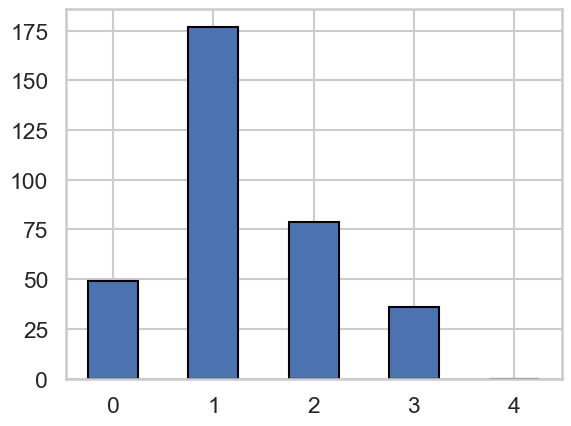

In [38]:
#CODE

bins = [0, 16, 32, 48, 64, 80]
labels = [0, 1, 2, 3, 4]

titanic["Age_bin"] = pd.cut(titanic["Age"], bins=bins, labels=labels, right=False, include_lowest=True)

values = titanic[titanic["Survived"] == 1]["Age_bin"].value_counts().values
lables = titanic["Age_bin"].value_counts().index


plt.bar(lables, values, width=0.5, edgecolor='black')



Ваші висновки: З графіку можна побачити що найбільша кількість людей які вижили знаходяться в 1 категорії, тобто люди віком 16 - 32 років.
Найменша кількість людей які вижили знаходяться в категорії 4 віком 64-80 років.

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

C:\Users\asus\AppData\Local\Temp\ipykernel_18308\3994809170.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare_bin = titanic.groupby("fare_bin")["Survived"].mean().reset_index()


    fare_bin  Survived
0  Quartile1  0.197309
1  Quartile2  0.303571
2  Quartile3  0.454955
3  Quartile4  0.581081


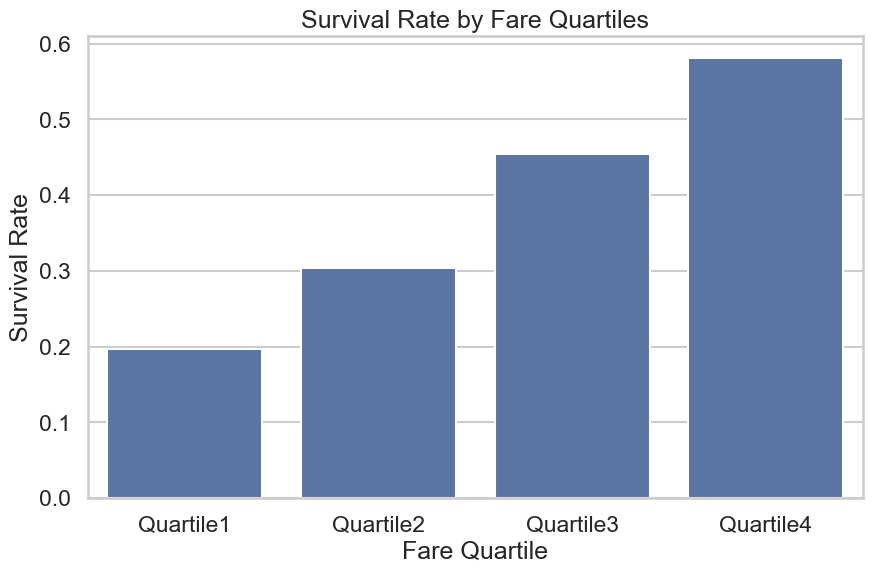

In [37]:
titanic["fare_bin"] = pd.qcut(titanic["Fare"], q=4, labels=['Quartile1', 'Quartile2', 'Quartile3', 'Quartile4'])


survival_by_fare_bin = titanic.groupby("fare_bin")["Survived"].mean().reset_index()
print(survival_by_fare_bin)

plt.figure(figsize=(10, 6))
sns.barplot(x="fare_bin", y="Survived", data=survival_by_fare_bin)
plt.title("Survival Rate by Fare Quartiles")
plt.xlabel("Fare Quartile")
plt.ylabel("Survival Rate")
plt.show()


Ваші висновки: З графіку видно що відповідно чим вища вартість квитка тим більший шанс вижити, оскільки з 4 квартилю де квитки найдорожчі вижило найбільше людей.

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [79]:
titanic["Family_size"] = (titanic["SibSp"] + titanic["SibSp"])
titanic["Alone"] = True
titanic.loc[(titanic["SibSp"] != 0) | (titanic["SibSp"] !=0) , ["Alone"]] = False

coeficients = titanic[['Survived', "Family_size"]].corr('pearson')


count_hasFamily = titanic["Alone"].value_counts()
print(f"number of people that have family - {count_hasFamily.loc[False]}")
print(f"number of people that do not have  family - {count_hasFamily.loc[True]}")
print(coeficients)

number of people that have family - 283
number of people that do not have  family - 608
             Survived  Family_size
Survived     1.000000    -0.035322
Family_size -0.035322     1.000000


Ваші висновки:
На титаніку знаходиться 283 людини які мають сім'ю та 608 які немають.
 Коефіцієнт кореляції між "Survived" та "Family_size" становить приблизно -0.035. Цей н коефіцієнт кореляції може свідчити про те, що існує дуже слабкий зв'язок між розміром сім'ї пасажирів та їхньою ймовірністю виживання на Титаніку. 

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [46]:
titanic.drop(labels=["PassengerId", "Name", "Cabin"], axis = 1, inplace=True)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_bin,fare_bin,Family_size,Alone
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S,1,Quartile1,2,False
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C,2,Quartile4,2,False
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,Quartile2,0,True
3,1,1,female,35.000000,1,0,113803,53.1000,S,2,Quartile4,2,False
4,0,3,male,35.000000,0,0,373450,8.0500,S,2,Quartile2,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S,1,Quartile2,0,True
887,1,1,female,19.000000,0,0,112053,30.0000,S,1,Quartile3,0,True
888,0,3,female,27.915709,1,2,W./C. 6607,23.4500,S,1,Quartile3,2,False
889,1,1,male,26.000000,0,0,111369,30.0000,C,1,Quartile3,0,True


Ваші висновки: 
Атрибут 'PassangerId' несе в собі індинтифікатор пасажира, тому його можна видалити оскільки він не містить інформації для підрахнку статистики.

Атрибут 'Cabin' містить 687 пропущених значень що становить приблизно 80% усіх значень, тому на на основі цього атрибути не можна робити ніяких гіпотез та аналізів. Оскільки результат буде не достовірний.

Атрибут 'Name' не несе якоїсь інформації по якій можна було б зробити якусь гіпотезу. Лише порахувати найпопулярніше ім'я (чоловіче чи жіноче).



***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [60]:
#CODE




def convert_column(column):
    column_values = titanic[column].value_counts().index

    for index, value in enumerate(column_values):
        titanic.loc[(titanic[column] == value), [column]] = index

    titanic[column] = titanic[column].astype('int64')


titanic['Embarked'].fillna(-1, inplace=True)
convert_column('Embarked')
convert_column('Sex')
titanic.dtypes






Survived          int64
Pclass            int64
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked          int64
Age_bin        category
fare_bin       category
Family_size       int64
Alone              bool
dtype: object

Ваші висновки:
Позначення перетворених значень
Embarked: 0 - S, 1 - C, 2 - Q
Sex: 0 - male, 1 - female

Перетворення категоріальних змінних в числові значення може бути корисним для деяких алгоритмів машинного навчання, які працюють лише з числовими даними. 


In [72]:
tit = pd.read_csv('titanic.csv')
tit["Sex"].value_counts()


Sex
male      577
female    314
Name: count, dtype: int64

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



Text(0.5, 0, 'Survived')

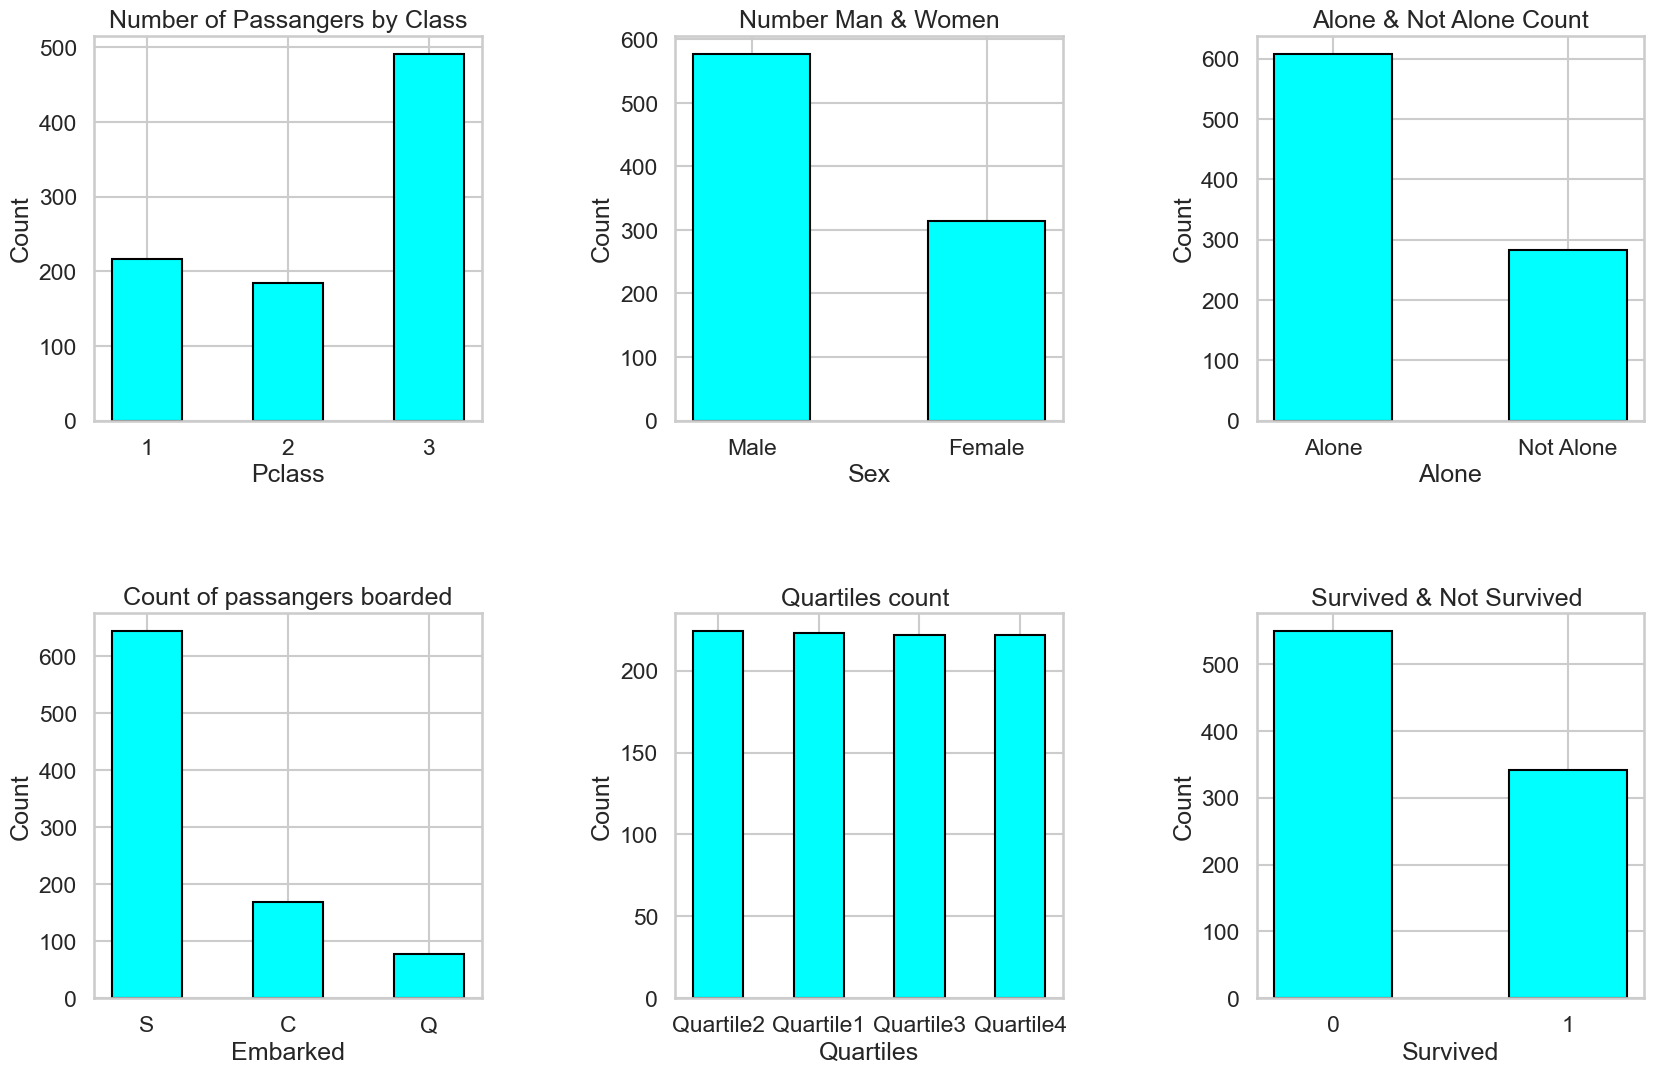

In [100]:
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

#1
plt.subplot(331)
pclass = titanic['Pclass'].value_counts()
plt.bar(pclass.index,  pclass.values , width=0.5, color='cyan', edgecolor='black')
plt.xticks(range(1, len(pclass.values)+1))
plt.title("Number of Passangers by Class")
plt.ylabel("Count")
plt.xlabel("Pclass")


#2
plt.subplot(332)
sex = titanic['Sex'].value_counts()
plt.bar(['Male', "Female"],  sex.values , width=0.5, color='cyan', edgecolor='black')
plt.title("Number Man & Women")
plt.ylabel("Count")
plt.xlabel("Sex")

#3
plt.subplot(333)
alone = titanic['Alone'].value_counts()
plt.bar(['Alone', "Not Alone"],  alone.values , width=0.5, color='cyan', edgecolor='black')
plt.title("Alone & Not Alone Count")
plt.ylabel("Count")
plt.xlabel("Alone")

#4
plt.subplot(334)
embarked = titanic['Embarked'].value_counts().iloc[:3]
plt.bar(['S', "C", "Q"],  embarked.values , width=0.5, color='cyan', edgecolor='black')
plt.title("Count of passangers boarded")
plt.ylabel("Count")
plt.xlabel("Embarked")


#5
plt.subplot(335)
fare_bins = titanic['fare_bin'].value_counts()
plt.bar(fare_bins.index,  fare_bins.values , width=0.5, color='cyan', edgecolor='black')
plt.title("Quartiles count ")
plt.ylabel("Count")
plt.xlabel("Quartiles")

#6
plt.subplot(336)
survived = titanic['Survived'].value_counts()
plt.bar(['0','1'],  survived.values , width=0.5, color='cyan', edgecolor='black')
plt.title("Survived & Not Survived ")
plt.ylabel("Count")
plt.xlabel("Survived")



Ваші висновки:

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

In [210]:
#code

Ваші висновки:

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

In [211]:
#code

Ваші висновки:

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.